In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

path = 'D:/CS/ML/DataFountain/unicom/'

train = pd.read_csv('%s%s' %(path, 'train.csv'))#, low_memory=False

test = pd.read_csv('%s%s' %(path, 'test.csv'))

F:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,5,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
F:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from numpy.core.umath_tests import inner1d
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  """Entry point for launching an IPython kernel.


In [3]:
train['2_total_fee'] = train['2_total_fee'].replace('\\N', 0)
train['3_total_fee'] = train['3_total_fee'].replace('\\N', 0)
train['age'] = train['age'].replace('\\N', 0)
train['gender'] = train['gender'].replace('\\N', 0)

test['2_total_fee'] = test['2_total_fee'].replace('\\N', 0)
test['3_total_fee'] = test['3_total_fee'].replace('\\N', 0)
test['age'] = test['age'].replace('\\N', 0)
test['gender'] = test['gender'].replace('\\N', 0)

train['gender'] = train['gender'].apply(lambda x : int(x))
test['gender'] = test['gender'].apply(lambda x : int(x))

train['age'] = train['age'].apply(lambda x : int(x))
test['age'] = test['age'].apply(lambda x : int(x))

train['2_total_fee'] = train['2_total_fee'].apply(lambda x : float(x))
test['2_total_fee'] = test['2_total_fee'].apply(lambda x : float(x))

train['3_total_fee'] = train['3_total_fee'].apply(lambda x : float(x))
test['3_total_fee'] = test['3_total_fee'].apply(lambda x : float(x))

In [4]:
train.head(10)

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service,user_id
0,4,0,85,295.96,296.20,296.00,296.80,3813.614698,0,1,...,108.100000,0.000000,564.366667,1,31,0,0,0.0,99999825,Gx4sJzcQog01UhZL
1,1,0,10,265.20,261.20,208.50,174.50,0.000000,1,0,...,240.100000,355.166667,0.000000,1,30,0,0,0.0,90063345,kEXrhTiug93DIcLG
2,1,0,12,44.50,70.20,69.00,61.40,2598.397406,0,0,...,27.666667,0.000000,98.416667,2,25,0,0,0.0,90109916,AouXr0EOUtSRdiYK
3,4,0,134,87.95,81.40,76.00,88.30,988.440563,0,0,...,89.900000,74.483333,121.833333,1,44,0,0,0.0,89950166,Yds7U30hnRZDiLtb
4,4,0,84,317.04,314.08,435.51,413.05,5885.800642,0,1,...,0.000000,35.100000,496.733333,1,31,2,1,0.0,99999825,OFDTSXrhN9Q2mbVw
5,4,0,46,36.00,36.00,36.00,37.20,218.003452,0,3,...,14.633333,0.000000,14.633333,1,42,0,0,0.0,89950168,4qHSn3dkPzJTAjoG
6,1,0,12,33.60,32.70,38.70,45.70,0.000000,0,0,...,6.116667,136.033333,0.000000,1,27,0,0,0.0,90063345,tXkjbzpTsZcxYPKG
7,3,0,68,200.13,66.50,66.50,66.50,0.000000,0,0,...,0.866667,0.000000,0.014444,1,24,0,0,0.0,99104722,Ip5i0LvzTkxyr1mQ
8,4,0,109,116.00,116.00,116.00,116.00,635.946276,0,9,...,250.883333,0.000000,310.733333,1,40,0,0,0.0,89950167,ro43b68MustgPyOR
9,4,0,29,16.00,19.45,19.60,17.80,0.002190,0,0,...,33.950000,0.000000,33.950000,1,50,0,0,0.0,89016252,PuslOvjEmUnqf2Fb


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612652 entries, 0 to 612651
Data columns (total 27 columns):
service_type              612652 non-null int64
is_mix_service            612652 non-null int64
online_time               612652 non-null int64
1_total_fee               612652 non-null float64
2_total_fee               612652 non-null float64
3_total_fee               612652 non-null float64
4_total_fee               612652 non-null float64
month_traffic             612652 non-null float64
many_over_bill            612652 non-null int64
contract_type             612652 non-null int64
contract_time             612652 non-null int64
is_promise_low_consume    612652 non-null int64
net_service               612652 non-null int64
pay_times                 612652 non-null int64
pay_num                   612652 non-null float64
last_month_traffic        612652 non-null float64
local_trafffic_month      612652 non-null float64
local_caller_time         612652 non-null float64
service

In [12]:
label = train['current_service']
le = LabelEncoder()
train['current_service'] = le.fit_transform(label)

In [13]:
# 结果为15种套餐,计划使用replace把替换成简单的数值

train['current_service'].value_counts()

6     201245
3      93252
4      51440
13     37146
0      36379
9      36289
7      26685
5      23316
12     22753
11     20393
8      15477
14     14840
10     14323
1      10019
2       9095
Name: current_service, dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262565 entries, 0 to 262564
Data columns (total 26 columns):
service_type              262565 non-null int64
is_mix_service            262565 non-null int64
online_time               262565 non-null int64
1_total_fee               262565 non-null float64
2_total_fee               262565 non-null float64
3_total_fee               262565 non-null float64
4_total_fee               262565 non-null float64
month_traffic             262565 non-null float64
many_over_bill            262565 non-null int64
contract_type             262565 non-null int64
contract_time             262565 non-null int64
is_promise_low_consume    262565 non-null int64
net_service               262565 non-null int64
pay_times                 262565 non-null int64
pay_num                   262565 non-null float64
last_month_traffic        262565 non-null float64
local_trafffic_month      262565 non-null float64
local_caller_time         262565 non-null float64
service

In [15]:
# 协方差（-1，1）之间

train_corr = train.drop('user_id', axis=1).corr()

train_corr.head(5)

,service_type,is_mix_service,online_time,1_total_fee,2_total_fee,3_total_fee,4_total_fee,month_traffic,many_over_bill,contract_type,...,local_trafffic_month,local_caller_time,service1_caller_time,service2_caller_time,gender,age,complaint_level,former_complaint_num,former_complaint_fee,current_service
service_type,1.000000,0.165782,0.600771,0.391076,0.370608,0.407649,0.389972,0.240506,-0.692560,0.437100,...,-0.407833,0.256314,-0.011264,0.375147,0.018058,0.315248,0.146479,0.135964,-0.000589,-0.038530
is_mix_service,0.165782,1.000000,0.103114,0.129755,0.121654,0.122624,0.116981,0.058558,-0.117031,0.092972,...,-0.059463,0.124490,-0.003507,0.161294,0.002978,0.051814,0.140934,0.127122,-0.000344,0.057642
online_time,0.600771,0.103114,1.000000,0.282436,0.269025,0.279310,0.283288,0.132643,-0.439332,0.269983,...,-0.260535,0.319986,0.045524,0.359838,-0.002284,0.471961,0.137738,0.124959,0.002237,0.016356
1_total_fee,0.391076,0.129755,0.282436,1.000000,0.831186,0.768826,0.792496,0.395091,-0.100566,0.171839,...,-0.042238,0.407673,0.284849,0.502075,-0.067779,0.027970,0.076003,0.068252,-0.000807,0.364218
2_total_fee,0.370608,0.121654,0.269025,0.831186,1.000000,0.793751,0.804411,0.359732,-0.076148,0.170850,...,-0.051692,0.379192,0.240775,0.485530,-0.068413,0.016644,0.080067,0.072982,-0.000525,0.350511


In [16]:
cols = train_corr.nlargest(25, 'current_service')

cols['current_service']

current_service           1.000000
1_total_fee               0.364218
2_total_fee               0.350511
4_total_fee               0.346762
3_total_fee               0.336618
service2_caller_time      0.323002
contract_time             0.212220
local_caller_time         0.197722
pay_num                   0.192765
net_service               0.138170
month_traffic             0.112656
pay_times                 0.078394
last_month_traffic        0.061712
is_mix_service            0.057642
is_promise_low_consume    0.055111
local_trafffic_month      0.043196
complaint_level           0.022215
former_complaint_num      0.018469
online_time               0.016356
service1_caller_time      0.009737
former_complaint_fee     -0.000760
contract_type            -0.013848
many_over_bill           -0.016134
service_type             -0.038530
gender                   -0.088730
Name: current_service, dtype: float64

### 套餐类型service_type	17

In [17]:
# 4:4g 1:2I2C 3:3g  0和2好像没有
train['service_type'].value_counts()

4    332956
1    243407
3     36289
Name: service_type, dtype: int64

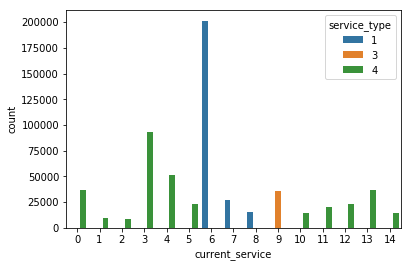

In [18]:
sns.countplot('current_service', hue='service_type', data=train)

In [19]:
# 4g

service_type4 = train[train['service_type'] == 4]
service_type4['current_service'].value_counts()

3     93252
4     51440
13    37146
0     36379
5     23316
12    22753
11    20393
14    14840
10    14323
1     10019
2      9095
Name: current_service, dtype: int64

In [20]:
# 2I2C

service_type1 = train[train['service_type'] == 1]
service_type1['current_service'].value_counts()

6    201245
7     26685
8     15477
Name: current_service, dtype: int64

In [21]:
# 3g

service_type3 = train[train['service_type'] == 3]
service_type3['current_service'].value_counts()

9    36289
Name: current_service, dtype: int64

考虑可以三个模型，放在一个函数里面。规则区分开进行判断

### 是否固移融合套餐is_mix_service 1是0否

In [22]:
train['is_mix_service'].value_counts()

0    590692
1     21960
Name: is_mix_service, dtype: int64

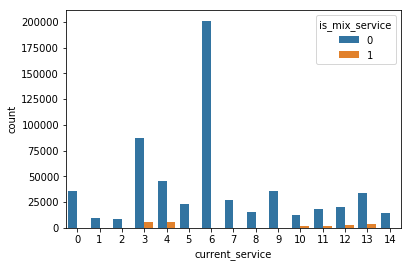

In [23]:
sns.countplot('current_service', hue='is_mix_service', data=train)

In [212]:
# 0 15种套餐都有

is_mix_service0 = train[train['is_mix_service'] == 0]
is_mix_service0['current_service'].value_counts()

90063345    201181
89950166     87074
89950167     45942
99104722     36289
89016252     36269
99999828     33727
90109916     26661
89950168     23252
99999827     20006
99999826     18207
90155946     15461
99999830     14835
99999825     12692
89016253     10005
89016259      9091
Name: current_service, dtype: int64

In [213]:
# 1 14种套餐 偏向固定几个

is_mix_service1 = train[train['is_mix_service'] == 1]
is_mix_service1['current_service'].value_counts()

89950166    6178
89950167    5498
99999828    3419
99999827    2747
99999826    2186
99999825    1631
89016252     110
90063345      64
89950168      64
90109916      24
90155946      16
89016253      14
99999830       5
89016259       4
Name: current_service, dtype: int64

### 在网时长 online_time

In [25]:
train.groupby(['current_service'])[['online_time']].agg(['mean','median','count', 'max', 'min'])

online_time                        
                       mean median   count  max min
current_service                                    
0                 63.378543     40   36379  274   1
1                 57.400539     37   10019  274   4
2                 49.812534     36    9095  274   4
3                 67.605210     57   93252  274   2
4                 68.665902     62   51440  274   4
5                 63.014496     45   23316  274   4
6                 10.383299     10  201245  235   4
7                 13.499831     12   26685  250   4
8                 11.092072     10   15477  189   4
9                 26.005126     20   36289  178   4
10                74.381554     74   14323  274   4
11                70.070465     68   20393  274   4
12                72.669274     69   22753  274   4
13                76.102164     68   37146  274   4
14                71.510243     60   14840  274  24

In [33]:
current_service0 = train[train['current_service'] == 0]
erro0 = current_service0[current_service0['online_time'] > 180]
erro0.count()

service_type              1386
is_mix_service            1386
online_time               1386
1_total_fee               1386
2_total_fee               1386
3_total_fee               1386
4_total_fee               1386
month_traffic             1386
many_over_bill            1386
contract_type             1386
contract_time             1386
is_promise_low_consume    1386
net_service               1386
pay_times                 1386
pay_num                   1386
last_month_traffic        1386
local_trafffic_month      1386
local_caller_time         1386
service1_caller_time      1386
service2_caller_time      1386
gender                    1386
age                       1386
complaint_level           1386
former_complaint_num      1386
former_complaint_fee      1386
current_service           1386
user_id                   1386
dtype: int64

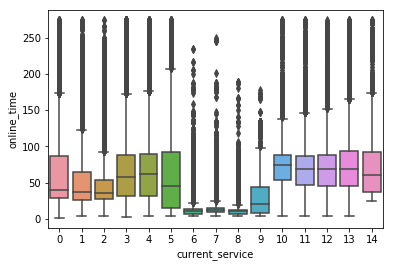

In [30]:
sns.boxplot(train['current_service'], train['online_time'])

### 当月总出账金额_ 月 1_total_fee

In [36]:
train.groupby(['current_service'])[['1_total_fee']].agg(['mean','median','count','min','max'])

1_total_fee                              
                       mean  median   count  min      max
current_service                                          
0                 44.735663   25.00   36379  0.0  2381.85
1                 64.717109   41.30   10019  0.0   950.80
2                 91.149967   63.60    9095  0.0  1417.05
3                 97.371974   79.45   93252  0.0  1385.43
4                138.521894  115.70   51440  0.0  5940.83
5                 71.727821   56.10   23316  0.0  1360.60
6                 56.070820   52.70  201245  0.0   582.39
7                 49.605416   39.00   26685  0.0   676.60
8                 93.108332   88.70   15477  0.0   636.50
9                 46.774630   33.55   36289  0.0  1142.14
10               344.039541  303.60   14323  0.0  3857.69
11               249.168324  211.10   20393  0.0  3046.00
12               212.539532  180.25   22753  0.0  2463.30
13               170.287332  144.70   37146  0.0  1562.36
14               119.952782   91.30   14840  0.0  1464.40

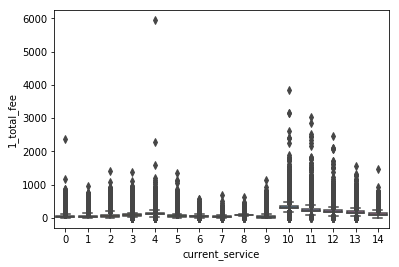

In [35]:
sns.boxplot(train['current_service'], train['1_total_fee'])

### 当月前1,2,3月总出账金额_月 2_total_fee 3,4

In [41]:
train.groupby(['current_service'])[['2_total_fee']].agg(['mean','median','count','min','max'])

2_total_fee                                 
                       mean  median   count     min      max
current_service                                             
0                 46.666153   24.40   36379  -32.30  1529.08
1                 68.972560   40.55   10019   -0.09  1106.85
2                 96.530543   61.30    9095   -6.04  1258.19
3                102.161265   81.00   93252 -287.30  1265.67
4                145.424389  120.00   51440 -114.45  3398.56
5                 75.588914   56.00   23316  -43.40  1791.20
6                 59.838347   55.10  201245   -0.09   644.40
7                 54.652667   41.20   26685   -0.09  1102.18
8                 99.395514   91.70   15477   -0.09   704.70
9                 47.146719   32.00   36289  -92.80  1074.01
10               363.065715  310.68   14323   -0.07  3865.29
11               261.257138  218.00   20393   -0.07  3013.24
12               222.776630  186.10   22753   -0.07  5825.57
13               179.431091  150.00   37146   -0.09  2275.20
14               126.142217   97.15   14840  -79.00  1021.80

In [43]:
train.groupby(['current_service'])[['3_total_fee']].agg(['mean','median','count','min','max'])

3_total_fee                                 
                       mean  median   count     min      max
current_service                                             
0                 48.611733   24.85   36379  -67.00  1635.64
1                 74.526776   46.00   10019   -0.09   944.21
2                105.191644   69.30    9095   -0.09   824.20
3                 98.167978   78.00   93252 -119.06  2223.94
4                139.065790  115.95   51440 -276.03  3902.38
5                 72.950290   56.00   23316  -36.02  2152.71
6                 49.873682   47.40  201245   -0.09   729.00
7                 51.790979   39.50   26685   -0.09   844.60
8                 87.699570   86.30   15477   -0.09   563.50
9                 50.838110   36.00   36289   -0.80  1223.38
10               346.244834  302.36   14323   -0.06  3620.09
11               245.051656  206.50   20393   -0.08  4669.99
12               208.781665  176.00   22753    0.00  6965.50
13               169.063169  142.00   37146    0.00  2335.16
14               122.454720   94.00   14840  -24.26  1397.85

In [45]:
train.groupby(['current_service'])[['4_total_fee']].agg(['mean','median','count','min','max'])

4_total_fee                                  
                       mean   median   count     min      max
current_service                                              
0                 47.964159   24.000   36379  -22.00  1626.37
1                 71.532657   41.550   10019   -0.09  1089.97
2                102.098919   65.150    9095   -0.09  1174.61
3                103.519798   81.400   93252  -28.20  1407.17
4                149.539590  122.800   51440  -65.35  5141.27
5                 75.319189   56.000   23316   -0.08  1437.34
6                 55.009629   52.000  201245   -1.80   762.44
7                 56.362931   45.000   26685   -0.07  1230.60
8                 96.525138   91.400   15477   -0.09   675.58
9                 50.993299   33.160   36289   -2.16   998.04
10               367.260933  314.100   14323    0.00  4823.91
11               265.553953  222.000   20393   -0.09  4049.16
12               227.264917  191.500   22753   -5.85  4469.10
13               184.278912  155.200   37146 -420.27  1481.28
14               129.435550  100.075   14840   -0.06   992.33

### 当月累计-流量 month_traffic

In [47]:
train.groupby(['current_service'])[['month_traffic']].agg(['mean','median','count','min','max'])

# 有无流量套餐，还有两个0流量众数需要考虑

month_traffic                                         
                         mean       median   count  min            max
current_service                                                       
0                  520.335655    86.722701   36379  0.0  101448.760761
1                 1007.803137   473.385750   10019  0.0   67127.345916
2                 1738.376394   915.550008    9095  0.0   79211.755713
3                 1695.690605   991.247272   93252  0.0  159057.397788
4                 1949.671142  1155.858589   51440  0.0  106970.287420
5                  896.022220   485.959632   23316  0.0   98001.943718
6                   84.599005     0.000000  201245  0.0   70026.652848
7                 3100.453039  2700.050958   26685  0.0  100982.629819
8                  116.814421     0.000000   15477  0.0   90791.925118
9                    0.000000     0.000000   36289  0.0       0.000000
10                3404.065920  2793.253001   14323  0.0   68364.325227
11                3539.567113  2921.328723   20393  0.0   62459.534965
12                2961.436064  2255.082734   22753  0.0   96584.222182
13                2084.717092  1265.982599   37146  0.0   89903.665928
14                1266.546312   611.553867   14840  0.0   84867.045440

### 连续超出套餐 many_over_bill

In [48]:
train['many_over_bill'].value_counts()

0    351137
1    261515
Name: many_over_bill, dtype: int64

In [223]:
many_over_bill_0 = train[train['many_over_bill'] == 0]
many_over_bill_0['current_service'].value_counts()

89950166    81670
89950167    44235
99104722    32190
99999828    31320
89016252    29319
90109916    21594
89950168    21541
99999827    19262
99999826    17630
99999825    12806
90063345    12581
99999830    11714
89016253     7616
89016259     6763
90155946      896
Name: current_service, dtype: int64

In [224]:
many_over_bill_1 = train[train['many_over_bill'] == 1]
many_over_bill_1['current_service'].value_counts()

90063345    188664
90155946     14581
89950166     11582
89950167      7205
89016252      7060
99999828      5826
90109916      5091
99104722      4099
99999827      3491
99999830      3126
99999826      2763
89016253      2403
89016259      2332
89950168      1775
99999825      1517
Name: current_service, dtype: int64

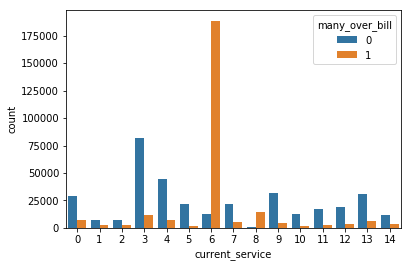

In [49]:
sns.countplot('current_service', hue='many_over_bill', data=train)

### 合约类型 contract_type

In [53]:
# 前五种数据量多
typecount = train['contract_type'].value_counts()
typecount

0     386469
1      89531
3      74188
9      38379
12     18585
7       2909
6       1911
2        669
8         11
Name: contract_type, dtype: int64

In [64]:
contract_type0 = train[train['contract_type'] == 12]
contract_type0['current_service'].value_counts()

3     6710
4     4678
11    2042
13    1460
12    1342
14     992
10     884
5      449
2       26
1        2
Name: current_service, dtype: int64

### 合约时长 contract_time

In [227]:
# 可以分析一下套餐内的有无以及和合约类型的对比
train.groupby(['current_service'])[['contract_time']].agg(['mean','median','count'])

contract_time               
                         mean median   count
current_service                             
89016252             0.740702      0   36379
89016253             0.557141      0   10019
89016259             0.357779      0    9095
89950166            12.020622     12   93252
89950167            17.194421     24   51440
89950168             8.774490     12   23316
90063345             0.000169      0  201245
90109916             0.000675      0   26685
90155946             0.000388      0   15477
99104722             0.000000      0   36289
99999825            22.726733     24   14323
99999826            19.630167     24   20393
99999827            15.911264     12   22753
99999828            14.970549     12   37146
99999830            13.103437      0   14840

### 是否承诺低消用户 is_promise_low_consume 1是0否

In [228]:
train['is_promise_low_consume'].value_counts()

0    571663
1     40989
Name: is_promise_low_consume, dtype: int64

In [229]:
is_promise_low_consume0 = train[train['is_promise_low_consume'] == 0]
is_promise_low_consume0['current_service'].value_counts()

90063345    201227
89950166     82015
89950167     44005
89016252     35110
99104722     34227
99999828     30935
90109916     26675
89950168     21547
99999827     19361
99999826     17707
90155946     15477
99999830     13030
99999825     12903
89016253      9263
89016259      8181
Name: current_service, dtype: int64

In [230]:
is_promise_low_consume1 = train[train['is_promise_low_consume'] == 1]
is_promise_low_consume1['current_service'].value_counts()

89950166    11237
89950167     7435
99999828     6211
99999827     3392
99999826     2686
99104722     2062
99999830     1810
89950168     1769
99999825     1420
89016252     1269
89016259      914
89016253      756
90063345       18
90109916       10
Name: current_service, dtype: int64

### 网络口径用户 net_service

In [231]:
train['net_service'].value_counts()

4    569781
3     26142
2     16373
9       356
Name: net_service, dtype: int64

In [232]:
net_service4 = train[train['net_service'] == 4]
net_service4['current_service'].value_counts()

90063345    197751
89950166     84275
89950167     48066
99999828     34635
99104722     34027
90109916     26186
89016252     24838
99999827     21953
99999826     19864
89950168     19647
90155946     15248
99999825     14022
99999830     12626
89016253      8458
89016259      8185
Name: current_service, dtype: int64

In [233]:
net_service3 = train[train['net_service'] == 3]
net_service3['current_service'].value_counts()

89950166    6365
89016252    5319
89950167    2338
89950168    1920
99999828    1848
90063345    1780
99104722    1726
99999830    1523
89016253     898
99999827     665
89016259     611
99999826     443
90109916     309
99999825     258
90155946     139
Name: current_service, dtype: int64

### 交费次数 pay_times

In [234]:
train['pay_times'].value_counts()

1      313721
2      169729
3       72003
4       29396
5       12875
6        6356
7        3378
8        1771
9        1084
10        655
11        429
12        301
13        235
14        140
15        117
16         93
17         62
18         47
19         38
21         33
20         22
22         19
23         17
27         14
25         14
46         13
24         12
26          9
28          9
29          7
33          6
32          5
40          5
36          5
30          4
39          3
37          2
38          2
52          2
49          2
72          2
48          1
85          1
61          1
97          1
51          1
98          1
41          1
47          1
45          1
43          1
42          1
35          1
34          1
31          1
127         1
Name: pay_times, dtype: int64

In [235]:
train.groupby(['current_service'])[['pay_times']].agg(['mean','median','count'])

pay_times               
                     mean median   count
current_service                         
89016252         1.505731      1   36379
89016253         1.670726      1   10019
89016259         1.903463      1    9095
89950166         1.919090      2   93252
89950167         2.121831      2   51440
89950168         1.769514      1   23316
90063345         1.856523      1  201245
90109916         1.477871      1   26685
90155946         2.174129      2   15477
99104722         1.622475      1   36289
99999825         2.510787      2   14323
99999826         2.325945      2   20393
99999827         2.261196      2   22753
99999828         2.178108      2   37146
99999830         2.000741      2   14840

### 交费金额 pay_num

In [236]:
# 和账单对比
train.groupby(['current_service'])[['pay_num']].agg(['mean','median','count'])

pay_num                 
                       mean   median   count
current_service                             
89016252          65.614454   50.000   36379
89016253          81.899676   50.000   10019
89016259         106.038509  100.000    9095
89950166         121.026622  100.000   93252
89950167         163.888392  111.085   51440
89950168          87.923275   50.060   23316
90063345          62.003971   50.000  201245
90109916          62.938933   50.000   26685
90155946          99.682769  100.000   15477
99104722          50.500859   30.000   36289
99999825         402.619708  300.000   14323
99999826         289.320891  200.080   20393
99999827         257.701459  200.000   22753
99999828         208.343227  193.075   37146
99999830         146.143153  100.000   14840

### last_month_traffic 上月结转流量

In [237]:
# 和当月累计流量对比
train.groupby(['current_service'])[['last_month_traffic']].agg(['mean','median','count'])

last_month_traffic                    
                              mean      median   count
current_service                                       
89016252                169.280511  150.000000   36379
89016253                327.604855  341.169107   10019
89016259                499.790687  378.131400    9095
89950166                451.295378  351.820563   93252
89950167                457.718408   84.745901   51440
89950168                348.398024  451.377821   23316
90063345                  2.219846    0.000000  201245
90109916                915.683872  636.314717   26685
90155946                  4.798956    0.000000   15477
99104722             348435.325774    0.000000   36289
99999825               1532.288673    0.000000   14323
99999826               1269.779258  184.493814   20393
99999827                845.797127   40.733622   22753
99999828                495.013569   67.950872   37146
99999830                329.485508  172.072345   14840

### 月累计-本地数据流量 local_trafffic_month

In [238]:
# 这应该是个本地流量
train.groupby(['current_service'])[['local_trafffic_month']].agg(['mean','median','count'])

local_trafffic_month                     
                                mean       median   count
current_service                                          
89016252                  516.919479    52.610693   36379
89016253                 1038.156854   443.686799   10019
89016259                 1795.514101   867.950427    9095
89950166                 1531.490477   717.557467   93252
89950167                 1993.326812   951.812342   51440
89950168                  799.263039   296.818352   23316
90063345                12475.384901  6341.213114  201245
90109916                 2823.207710  2111.547701   26685
90155946                12215.319067  5970.359948   15477
99104722                 5590.070129  2664.940430   36289
99999825                 3686.131513  2682.035457   14323
99999826                 3631.720284  2480.827991   20393
99999827                 2958.677330  1899.815620   22753
99999828                 1964.283932   953.059450   37146
99999830                 1085.753291   340.789895   14840

### 本地语音主叫通话时长 local_caller_time

In [239]:
train.groupby(['current_service'])[['local_caller_time']].agg(['mean','median','count'])

local_caller_time                    
                             mean      median   count
current_service                                      
89016252                35.728959   11.866667   36379
89016253                43.493471   17.883333   10019
89016259                47.693555   20.516667    9095
89950166                64.037771   32.550000   93252
89950167                91.069596   50.550000   51440
89950168                41.185910   16.683333   23316
90063345                19.888141    1.533333  201245
90109916                37.376920   10.200000   26685
90155946                66.899173   17.683333   15477
99104722                27.229918    6.916667   36289
99999825               204.031985  124.016667   14323
99999826               138.598206   81.400000   20393
99999827               143.677360   86.266667   22753
99999828               147.559217   87.325000   37146
99999830                57.631850   23.516667   14840

### 套外主叫通话时长 service1_caller_time

In [240]:
train.groupby(['current_service'])[['service1_caller_time']].agg(['mean','median','count'])

service1_caller_time                   
                                mean     median   count
current_service                                        
89016252                   43.038866   0.000000   36379
89016253                   49.310477   0.000000   10019
89016259                   53.375210   0.633333    9095
89950166                   35.964532   0.000000   93252
89950167                   42.569877   0.000000   51440
89950168                   37.951095   0.000000   23316
90063345                   50.605693  14.483333  201245
90109916                   30.993467   0.000000   26685
90155946                   13.528140   0.000000   15477
99104722                    0.294305   0.000000   36289
99999825                   49.591687   0.000000   14323
99999826                   57.971385   0.000000   20393
99999827                   56.071768   0.000000   22753
99999828                   54.609182   0.000000   37146
99999830                   42.857992   0.000000   14840

In [241]:
# Service2_caller_time	
train.groupby(['current_service'])[['service2_caller_time']].agg(['mean','median','count'])

service2_caller_time                    
                                mean      median   count
current_service                                         
89016252                   26.669968   28.600000   36379
89016253                   29.515111   33.466667   10019
89016259                   29.607554   33.733333    9095
89950166                  101.971201  101.983333   93252
89950167                  140.022182  136.875000   51440
89950168                   50.343960   54.100000   23316
90063345                    9.358843    0.000000  201245
90109916                   77.355509   59.133333   26685
90155946                  163.207941  104.633333   15477
99104722                    0.750948    0.475833   36289
99999825                  387.739654  335.650000   14323
99999826                  225.075856  208.166667   20393
99999827                  231.035805  218.483333   22753
99999828                  244.897085  239.450000   37146
99999830                   90.359473   93.491667   14840

### 性别 gender

In [242]:
# 数据杂乱需要归类

#train['gender'] = train['gender'].replace('01', 1)

train['gender'] = train['gender'].convert_objects(convert_numeric=True)

train['gender'].value_counts()


F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


1.0    406048
2.0    188323
0.0     18279
Name: gender, dtype: int64

### 年龄 age

In [243]:

#age = age.replace('\N',np.nan)

#train['age'] = train['age'].replace(0, np.nan)

#train['age'] = train['age'].replace('NA', np.nan)

train['age'] = train['age'].convert_objects(convert_numeric=True)

train['age'].value_counts()
#traindata=pd.DataFrame(train['age'],dtype=np.int)

#traindata['age'].value_counts()

F:\anaconda\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


28.0    33155
27.0    27649
26.0    25567
25.0    25483
22.0    25278
23.0    25250
24.0    24941
29.0    24260
30.0    22992
21.0    21734
31.0    20406
20.0    19084
0.0     17999
32.0    16831
19.0    16822
35.0    15537
33.0    15437
36.0    15143
34.0    15077
38.0    12352
18.0    12308
37.0    11738
39.0    11732
40.0    10574
41.0    10061
42.0     9895
45.0     9469
44.0     9412
43.0     9358
46.0     8838
        ...  
72.0      279
73.0      214
74.0      173
75.0      120
76.0       91
77.0       83
78.0       74
79.0       47
15.0       42
80.0       41
83.0       36
81.0       34
82.0       24
85.0       21
84.0       18
86.0       14
14.0       14
88.0        8
89.0        7
87.0        6
12.0        5
13.0        5
90.0        3
99.0        2
11.0        2
92.0        2
93.0        1
94.0        1
91.0        1
6.0         1
Name: age, Length: 87, dtype: int64

### 投诉重要性  complaint_level  1：普通，2：重要，3：重大

In [244]:
train['complaint_level'].value_counts()
# 0? 没有投诉？

0    550118
1     53749
2      7067
3      1718
Name: complaint_level, dtype: int64

#### 交费金历史投诉总量 former_complaint_num 次数

In [245]:
train['former_complaint_num'].value_counts()

0     550118
1      46254
2      12612
3       2184
4        859
5        302
6        149
7         75
8         35
9         20
10        14
11        11
23         4
12         4
13         3
14         2
17         2
19         2
16         1
37         1
Name: former_complaint_num, dtype: int64

#### 历史执行补救费用交费金额 former_complaint_fee

In [246]:
train.groupby(['current_service'])[['former_complaint_fee']].agg(['mean','median','count'])

former_complaint_fee               
                                mean median   count
current_service                                    
89016252                8.051084e+02    0.0   36379
89016253                9.455952e+02    0.0   10019
89016259                8.726449e+02    0.0    9095
89950166                1.395494e+07    0.0   93252
89950167                5.141739e+02    0.0   51440
89950168                8.306441e+02    0.0   23316
90063345                8.756379e+06    0.0  201245
90109916                8.652194e+01    0.0   26685
90155946                6.727085e+01    0.0   15477
99104722                3.222975e+02    0.0   36289
99999825                7.934353e+02    0.0   14323
99999826                7.597349e+02    0.0   20393
99999827                6.620375e+02    0.0   22753
99999828                5.421932e+02    0.0   37146
99999830                3.461764e+02    0.0   14840

## 特征工程

In [247]:
ntrain = train.shape[0]
ntest = test.shape[0]
ntrain,ntest

(612652, 262565)

In [248]:
test['current_service'] = None

train_test = pd.concat((train, test)).reset_index(drop=True)

F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [249]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875217 entries, 0 to 875216
Data columns (total 27 columns):
1_total_fee               875217 non-null float64
2_total_fee               875213 non-null object
3_total_fee               875216 non-null object
4_total_fee               875217 non-null float64
age                       875215 non-null float64
complaint_level           875217 non-null int64
contract_time             875217 non-null int64
contract_type             875217 non-null int64
current_service           612652 non-null object
former_complaint_fee      875217 non-null float64
former_complaint_num      875217 non-null int64
gender                    875215 non-null float64
is_mix_service            875217 non-null int64
is_promise_low_consume    875217 non-null int64
last_month_traffic        875217 non-null float64
local_caller_time         875217 non-null float64
local_trafffic_month      875217 non-null float64
many_over_bill            875217 non-null int64
month_

In [250]:
total = train_test.isnull().sum().sort_values(ascending=False)
total

current_service           262565
2_total_fee                    4
age                            2
gender                         2
3_total_fee                    1
user_id                        0
is_mix_service                 0
4_total_fee                    0
complaint_level                0
contract_time                  0
contract_type                  0
former_complaint_fee           0
former_complaint_num           0
is_promise_low_consume         0
service_type                   0
last_month_traffic             0
local_caller_time              0
local_trafffic_month           0
many_over_bill                 0
month_traffic                  0
net_service                    0
online_time                    0
pay_num                        0
pay_times                      0
service1_caller_time           0
service2_caller_time           0
1_total_fee                    0
dtype: int64

In [251]:
zero_col = ['2_total_fee', 'age', 'gender', '3_total_fee']

for col in zero_col:
    train_test[col].fillna(0, inplace=True)

In [252]:
# 用户id应该是无用标签
train_test.drop('user_id', axis=1, inplace=True)
train_test.drop('current_service', axis=1, inplace=True)

In [253]:
train_test['gender'] = train['gender'].convert_objects(convert_numeric=True)

train_test.loc[train_test['gender'] == 0.0, 'gender_0'] = 1

train_test.loc[train_test['gender'] != 0.0, 'gender_0'] = 0

train_test.loc[train_test['gender'] == 1.0, 'gender_1'] = 1

train_test.loc[train_test['gender'] != 1.0, 'gender_1'] = 0

train_test.loc[train_test['gender'] == 2.0, 'gender_2'] = 1

train_test.loc[train_test['gender'] != 2.0, 'gender_2'] = 0

train_test.drop('gender', axis=1, inplace=True)


F:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [254]:
#NumStr = ['service_type', 'is_mix_service', 'many_over_bill', 'contract_type', 'is_promise_low_consume', 'net_service', 'gender', 'complaint_level']

train_test['service_type'] = train_test['service_type'].astype(str)
train_test['is_mix_service'] = train_test['is_mix_service'].astype(str)
train_test['many_over_bill'] = train_test['many_over_bill'].astype(str)
train_test['contract_type'] = train_test['contract_type'].astype(str)
train_test['is_promise_low_consume'] = train_test['is_promise_low_consume'].astype(str)
train_test['net_service'] = train_test['net_service'].astype(str)

#train_test['gender'] = train_test['gender'].astype(str)
train_test['complaint_level'] = train_test['complaint_level'].astype(str)
#train_test['2_total_fee'] = train['2_total_fee'].convert_objects(convert_numeric=True)
#train_test['3_total_fee'] = train['3_total_fee'].convert_objects(convert_numeric=True)
train_test.info()

#for col in NumStr:
#    train_test[col] = train_test[col].astype(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875217 entries, 0 to 875216
Data columns (total 27 columns):
1_total_fee               875217 non-null float64
2_total_fee               875217 non-null object
3_total_fee               875217 non-null object
4_total_fee               875217 non-null float64
age                       875217 non-null float64
complaint_level           875217 non-null object
contract_time             875217 non-null int64
contract_type             875217 non-null object
former_complaint_fee      875217 non-null float64
former_complaint_num      875217 non-null int64
is_mix_service            875217 non-null object
is_promise_low_consume    875217 non-null object
last_month_traffic        875217 non-null float64
local_caller_time         875217 non-null float64
local_trafffic_month      875217 non-null float64
many_over_bill            875217 non-null object
month_traffic             875217 non-null float64
net_service               875217 non-null object
o

In [255]:
# 是否需要正态化，等数据对比
numeric_feats = train_test.dtypes[train_test.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
former_complaint_fee,683.112780
pay_num,80.170307
last_month_traffic,32.424503
month_traffic,9.622002
pay_times,8.277657
former_complaint_num,6.718831
gender_0,6.700921
service1_caller_time,6.536101
service2_caller_time,6.150038
local_caller_time,5.652817


skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train_test[feat] = boxcox1p(train_test[feat], lam)

In [256]:
#dummies_col = ['service_type', 'is_mix_service', 'many_over_bill', 'contract_type', 'is_promise_low_consume', 'net_service', 'complaint_level']

train_test = pd.get_dummies(train_test, columns=['service_type', 'is_mix_service', 'many_over_bill', 'contract_type', 'is_promise_low_consume', 'net_service', 'complaint_level'])
print(train_test.shape)

(875217, 46)


In [257]:
#train['age'] = train['age'].replace('NA', np.nan)

train['current_service'] = train['current_service'].replace(89016252, 1)
train['current_service'] = train['current_service'].replace(89016253, 2)
train['current_service'] = train['current_service'].replace(89016259, 3)
train['current_service'] = train['current_service'].replace(89950166, 4)
train['current_service'] = train['current_service'].replace(89950167, 5)
train['current_service'] = train['current_service'].replace(89950168, 6)
train['current_service'] = train['current_service'].replace(90063345, 7)
train['current_service'] = train['current_service'].replace(90109916, 8)
train['current_service'] = train['current_service'].replace(90155946, 9)
train['current_service'] = train['current_service'].replace(99104722, 10)
train['current_service'] = train['current_service'].replace(99999825, 11)
train['current_service'] = train['current_service'].replace(99999826, 12)
train['current_service'] = train['current_service'].replace(99999827, 13)
train['current_service'] = train['current_service'].replace(99999828, 14)
train['current_service'] = train['current_service'].replace(99999830, 15)

In [258]:
train_test['2_total_fee'] = train_test['2_total_fee'].replace('\\N', 0)
train_test['3_total_fee'] = train_test['3_total_fee'].replace('\\N', 0)
train_test['age'] = train_test['age'].replace('\\N', 0)
#train_test['gender'] = train_test['gender'].replace('\\N', 0)

In [259]:
train_X = train_test[:ntrain]
test_X = train_test[ntrain:]
train_Y = train['current_service']

In [260]:
train_X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612652 entries, 0 to 612651
Data columns (total 46 columns):
1_total_fee                 612652 non-null float64
2_total_fee                 612652 non-null object
3_total_fee                 612652 non-null object
4_total_fee                 612652 non-null float64
age                         612652 non-null float64
contract_time               612652 non-null int64
former_complaint_fee        612652 non-null float64
former_complaint_num        612652 non-null int64
last_month_traffic          612652 non-null float64
local_caller_time           612652 non-null float64
local_trafffic_month        612652 non-null float64
month_traffic               612652 non-null float64
online_time                 612652 non-null int64
pay_num                     612652 non-null float64
pay_times                   612652 non-null int64
service1_caller_time        612652 non-null float64
service2_caller_time        612652 non-null float64
gender_0       

In [263]:
test_X[test_X['2_total_fee'] == '\\N']

,1_total_fee,2_total_fee,3_total_fee,4_total_fee,age,contract_time,former_complaint_fee,former_complaint_num,last_month_traffic,local_caller_time,...,is_promise_low_consume_0,is_promise_low_consume_1,net_service_2,net_service_3,net_service_4,net_service_9,complaint_level_0,complaint_level_1,complaint_level_2,complaint_level_3


In [262]:
# 线性模型需要用标准化的数据建模

from sklearn.preprocessing import RobustScaler
ss2 = RobustScaler()
ss2.fit(train_X)
train_X_sd = ss2.transform(train_X)
test_X_sd = ss2.transform(test_X)